In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
petrol = pd.read_csv('petrol_consumption.csv')
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
petrol.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [4]:
x= petrol.drop('Petrol_Consumption', axis=1)
y= petrol['Petrol_Consumption']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [6]:
from sklearn.ensemble import RandomForestRegressor

randomForestModel= RandomForestRegressor(n_estimators=200,
                                         bootstrap=True,
                                        max_features='sqrt')
randomForestModel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
#use the model to predict the test dataset
rf= randomForestModel.predict(x_test)

In [42]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, rf)))

Mean Squared Error: 4421.603252500002
Mean Absolute Error: 50.40050000000001
Root mean squared error: 66.49513705903614


In [9]:
randomForestModel.score(x,y)

0.8760961336066371

In [43]:
feature_list=x_train.columns
#a list of the columns used to train the models
importances = list(randomForestModel.feature_importances_)
#extract importance of each column in the model

In [44]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [45]:
#sort the data based on the numerical column, highest to lowest
feature_importances = sorted(feature_importances, key = lambda 
                             x: x[1], reverse = True) 

In [46]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Population_Driver_licence(%) Importance: 0.48
Variable: Average_income       Importance: 0.23
Variable: Petrol_tax           Importance: 0.17
Variable: Paved_Highways       Importance: 0.12


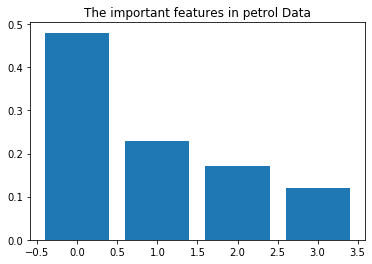

In [47]:
plt.bar(range(len(feature_importances)), [imp[1] for imp in feature_importances], 
        align='center')

plt.title('The important features in petrol Data');

In [48]:
rf_most_impt = RandomForestRegressor(n_estimators=500, 
                                     random_state=5)

In [49]:
feature_list

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

In [50]:
important_indices = [feature_list[3], feature_list[1]] 

train_important = x_train.loc[:, ['Petrol_tax',
                                  'Average_income',
                                  'Population_Driver_licence(%)']]

test_important = x_test.loc[:, ['Petrol_tax',
                                'Average_income',
                                'Population_Driver_licence(%)']]

In [51]:
rf_most_impt.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [52]:
prediction = rf_most_impt.predict(test_important)
prediction

array([624.968, 573.962, 584.212, 600.048, 502.422, 635.338, 508.942,
       872.808, 537.024, 567.308])

In [53]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Squared Error: 7744.8581712
Mean Absolute Error: 52.36120000000001
Root mean squared error: 88.0048758376489
